<a href="https://colab.research.google.com/github/mke27/ECON3916-Statistical-Machine-Learning/blob/main/Lab_3_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: IDN (Indonesia), UMC (Upper Middle Income), WLD (World)
country_codes = ['IDN', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [7]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Indonesia for specific calculations
df_idn = df.xs('IDN', axis=1, level=0).copy()

Fetching data...


In [8]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_idn['Natural_Rate_Unemp'] = df_idn['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_idn['Productivity'] = df_idn['GDP_Const'] / df_idn['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_idn['NCO'] = df_idn['Exports_GDP'] - df_idn['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_idn['Budget_Balance'] = df_idn['Tax_Rev_GDP'] - df_idn['Gov_Exp_GDP']

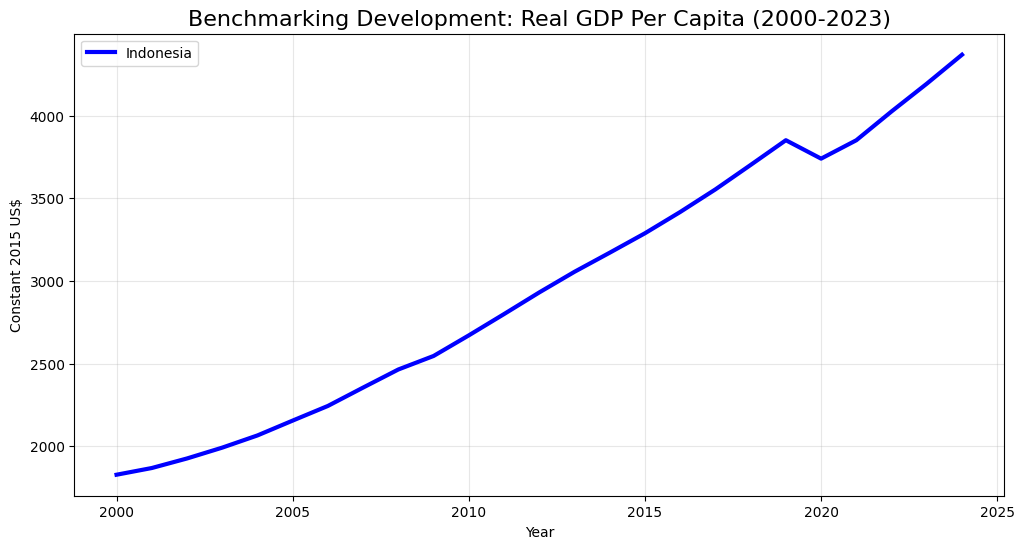

In [9]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('IDN', 'GDP_Per_Capita_Const')], label='Indonesia', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

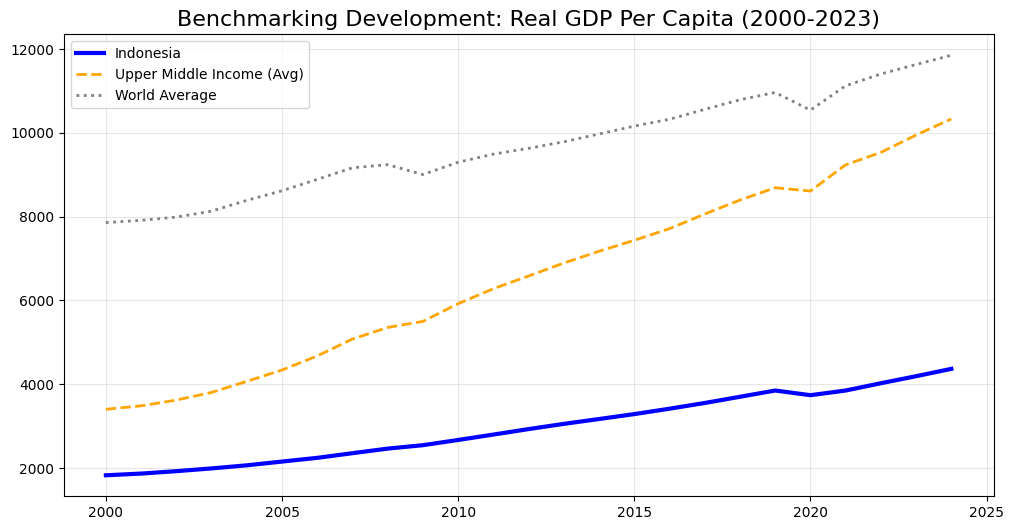

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('IDN', 'GDP_Per_Capita_Const')], label='Indonesia', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

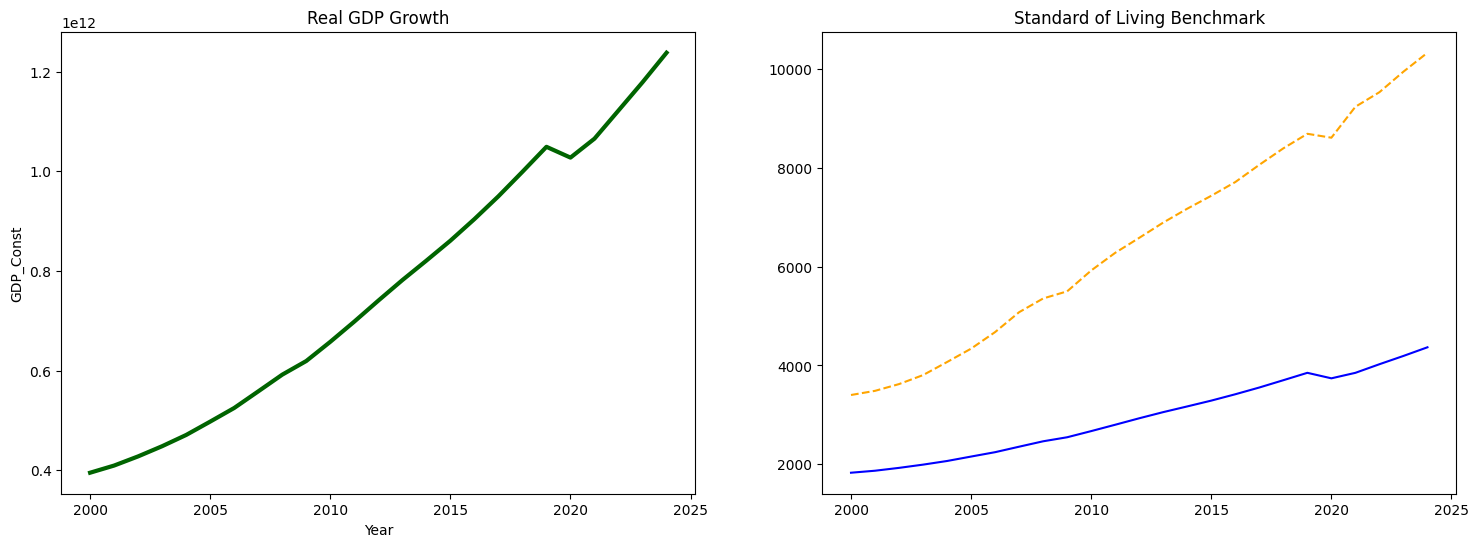

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_idn, x=df_idn.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('IDN', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

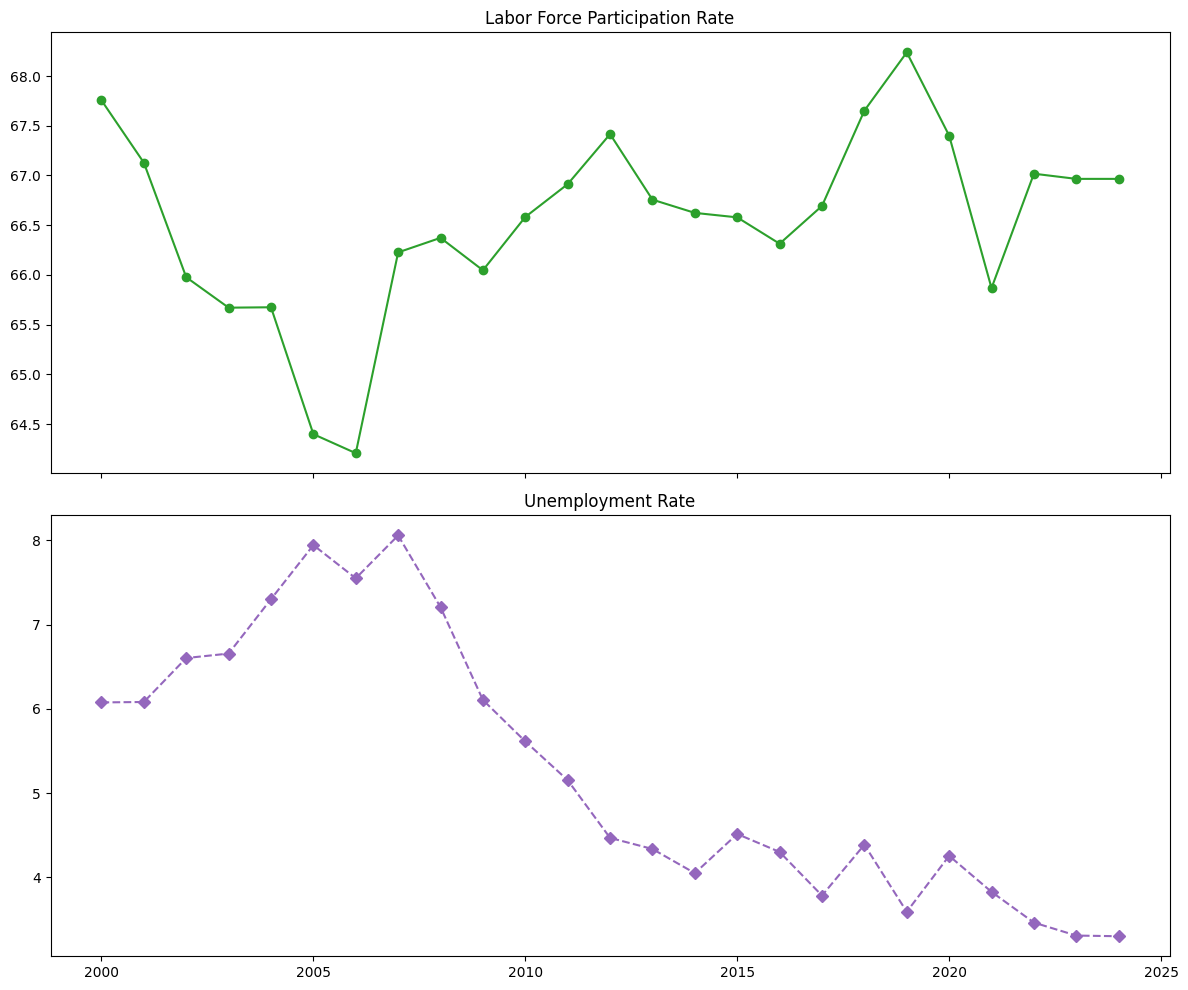

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_idn.index, df_idn['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_idn.index, df_idn['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

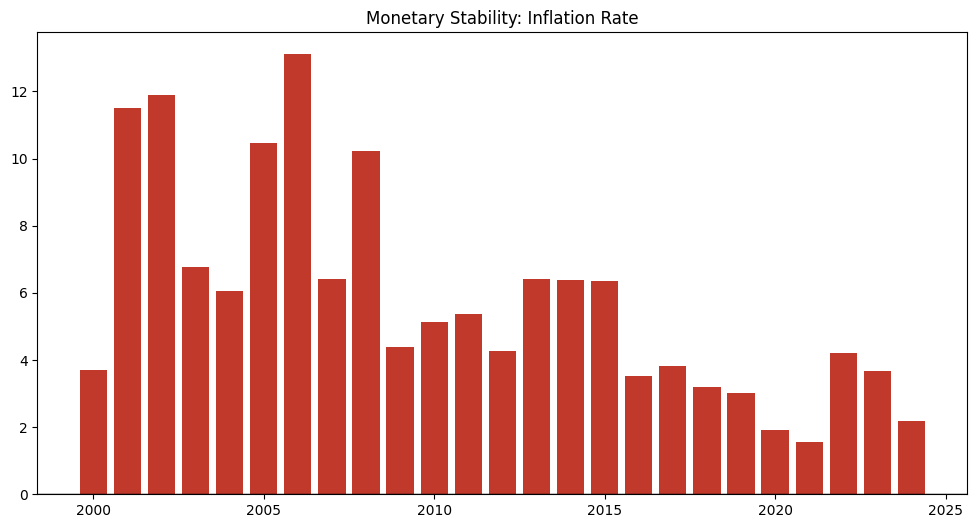

In [13]:
plt.figure(figsize=(12, 6))

plt.bar(df_idn.index, df_idn['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()


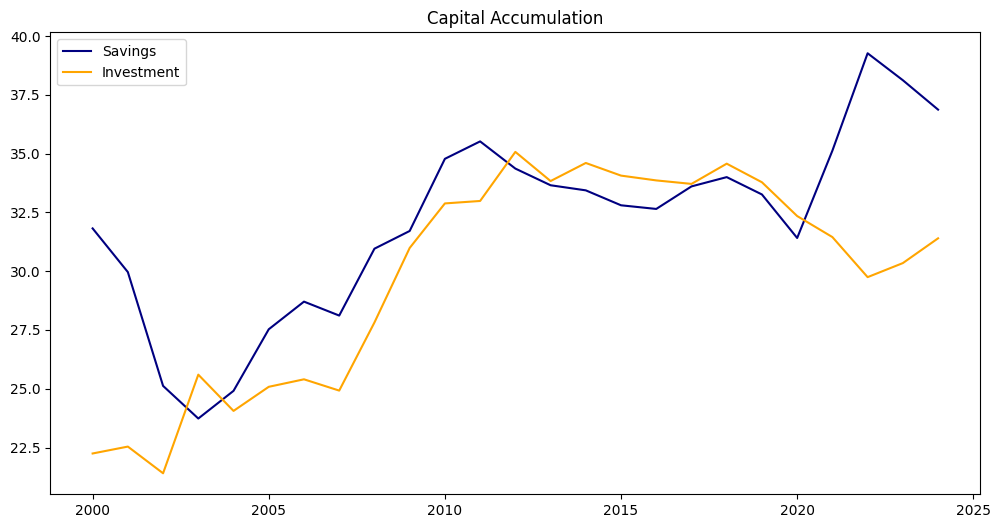

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_idn.index, df_idn['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_idn.index, df_idn['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

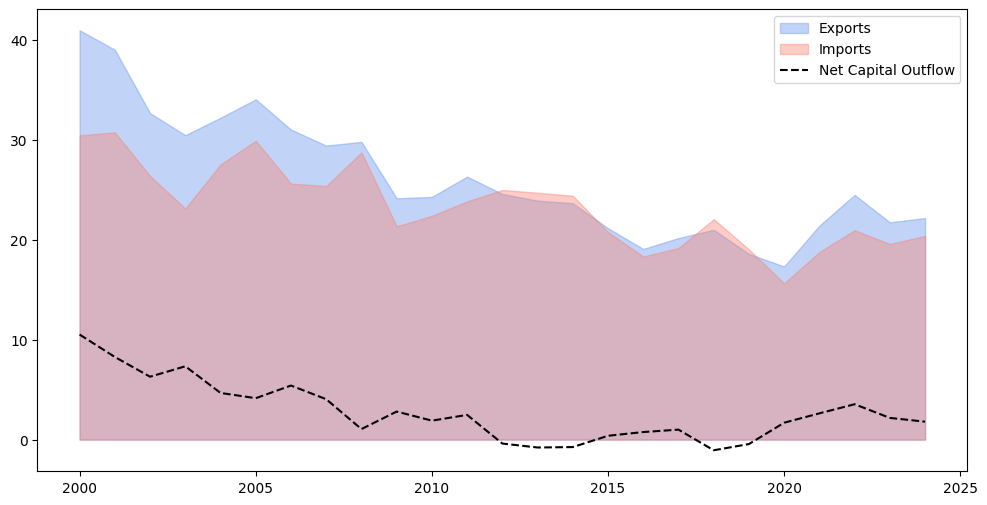

In [15]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_idn.index, df_idn['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_idn.index, df_idn['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_idn.index, df_idn['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()


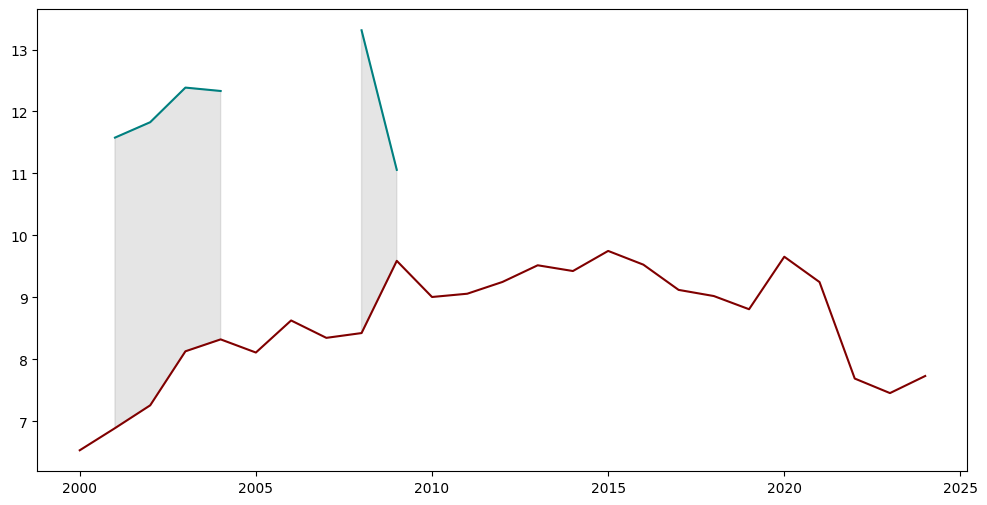

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_idn.index, df_idn['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_idn.index, df_idn['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_idn.index, df_idn['Tax_Rev_GDP'], df_idn['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

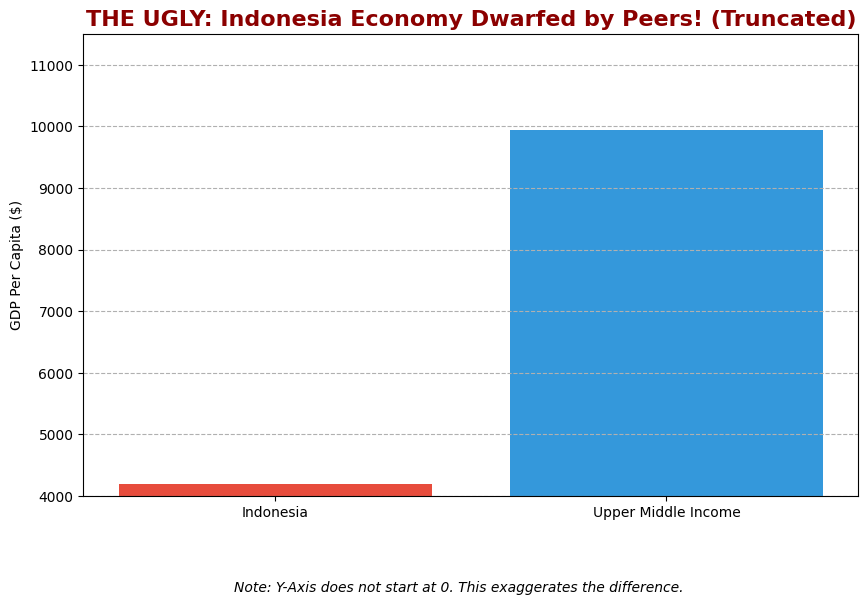

In [17]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
idn_val = df.loc[snapshot_year, ('IDN', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [idn_val, umc_val]
labels = ['Indonesia', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Indonesia Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

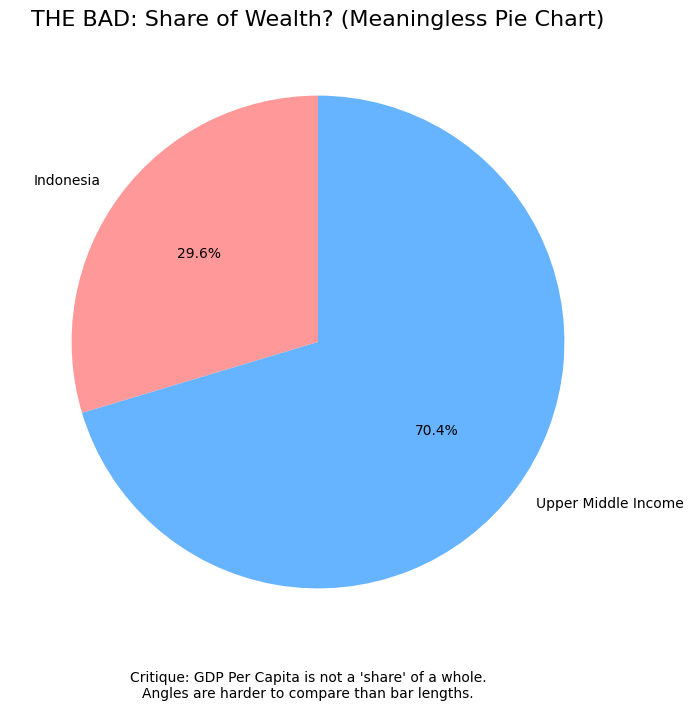

In [18]:
#THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

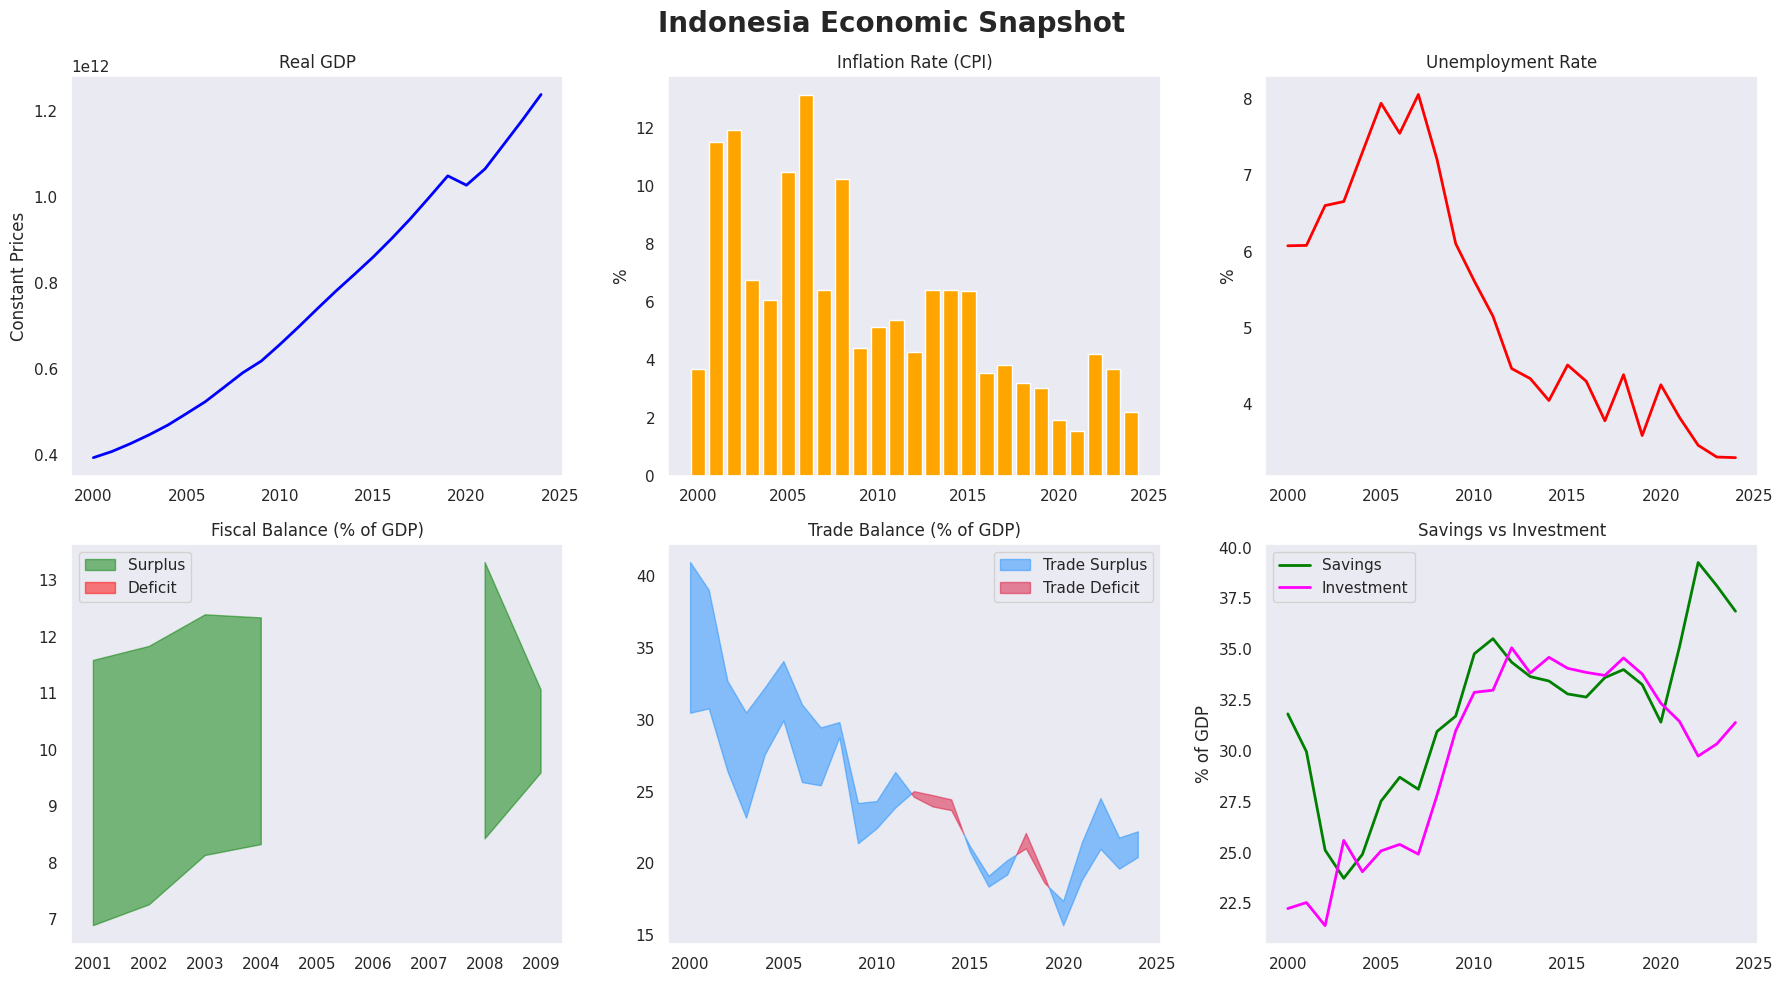

In [21]:
# Style
plt.style.use('dark_background')
sns.set_theme(style="dark")

# Create figure and axes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# =========================
# Top Row
# =========================

# 1. Real GDP (Line)
axes[0, 0].plot(df_idn.index, df_idn['GDP_Const'], color='blue', linewidth=2)
axes[0, 0].set_title('Real GDP')
axes[0, 0].set_ylabel('Constant Prices')

# 2. Inflation (Bar + zero line)
axes[0, 1].bar(df_idn.index, df_idn['Inflation_CPI'], color='orange')
axes[0, 1].axhline(0, color='white', linestyle='--', linewidth=1)
axes[0, 1].set_title('Inflation Rate (CPI)')
axes[0, 1].set_ylabel('%')

# 3. Unemployment (Line)
axes[0, 2].plot(df_idn.index, df_idn['Unemployment_Rate'],
                color='red', linewidth=2)
axes[0, 2].set_title('Unemployment Rate')
axes[0, 2].set_ylabel('%')

# =========================
# Bottom Row
# =========================

# 4. Fiscal Balance (Tax vs Gov Expenditure)
axes[1, 0].fill_between(
    df_idn.index,
    df_idn['Tax_Rev_GDP'],
    df_idn['Gov_Exp_GDP'],
    where=df_idn['Tax_Rev_GDP'] >= df_idn['Gov_Exp_GDP'],
    interpolate=True,
    color='green',
    alpha=0.5,
    label='Surplus'
)

axes[1, 0].fill_between(
    df_idn.index,
    df_idn['Tax_Rev_GDP'],
    df_idn['Gov_Exp_GDP'],
    where=df_idn['Tax_Rev_GDP'] < df_idn['Gov_Exp_GDP'],
    interpolate=True,
    color='red',
    alpha=0.5,
    label='Deficit'
)

axes[1, 0].set_title('Fiscal Balance (% of GDP)')
axes[1, 0].legend()

# 5. Trade Balance (Exports vs Imports)
axes[1, 1].fill_between(
    df_idn.index,
    df_idn['Exports_GDP'],
    df_idn['Imports_GDP'],
    where=df_idn['Exports_GDP'] >= df_idn['Imports_GDP'],
    interpolate=True,
    color='dodgerblue',
    alpha=0.5,
    label='Trade Surplus'
)

axes[1, 1].fill_between(
    df_idn.index,
    df_idn['Exports_GDP'],
    df_idn['Imports_GDP'],
    where=df_idn['Exports_GDP'] < df_idn['Imports_GDP'],
    interpolate=True,
    color='crimson',
    alpha=0.5,
    label='Trade Deficit'
)

axes[1, 1].set_title('Trade Balance (% of GDP)')
axes[1, 1].legend()

# 6. Savings vs Investment
axes[1, 2].plot(df_idn.index, df_idn['Gross_Dom_Savings'],
                label='Savings', linewidth=2, color='green')
axes[1, 2].plot(df_idn.index, df_idn['Gross_Cap_Formation'],
                label='Investment', linewidth=2, color='magenta')

axes[1, 2].set_title('Savings vs Investment')
axes[1, 2].set_ylabel('% of GDP')
axes[1, 2].legend()

# =========================
# Final Touches
# =========================

fig.suptitle('Indonesia Economic Snapshot', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()